In [3]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

In [4]:
# ========================================
# IMPORT DATAFRAME
# ========================================
df = pd.read_csv('data/df01.csv', sep=',', na_filter=False, index_col=0, parse_dates=['deadline','created_at','launched_at'])

In [5]:
df.shape

(173887, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173887 entries, 0 to 173886
Data columns (total 15 columns):
id                       173887 non-null int64
name                     173887 non-null object
category                 173887 non-null object
goal                     173887 non-null float64
backers_count            173887 non-null int64
pledged                  173887 non-null float64
disable_communication    173887 non-null bool
country                  173887 non-null object
deadline                 173887 non-null datetime64[ns]
created_at               173887 non-null datetime64[ns]
launched_at              173887 non-null datetime64[ns]
staff_pick               173887 non-null bool
spotlight                173887 non-null bool
creator_registered       173887 non-null bool
launch_state             173887 non-null object
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 16.6+ MB


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.isna().sum().sum()

0

In [9]:
# ========================================
# EXPLORATORY DATA ANALYSIS
# ========================================

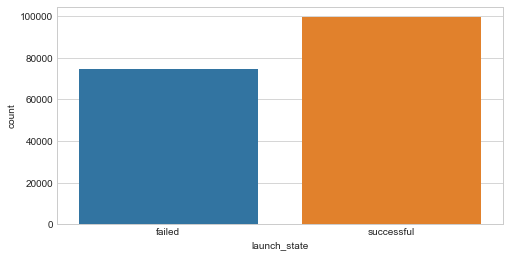

In [9]:
fig=plt.figure(figsize=(8, 4))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [17]:
df.columns

Index(['id', 'name', 'category', 'goal', 'backers_count', 'pledged',
       'disable_communication', 'country', 'deadline', 'created_at',
       'launched_at', 'staff_pick', 'spotlight', 'creator_registered',
       'launch_state'],
      dtype='object')

In [10]:
df.drop(columns=['id','name']).head(2)

,category,goal,backers_count,pledged,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_registered,launch_state
0,technology,3500.0,1,50.00,False,US,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,True,failed
1,games,225.0,63,1613.47,False,US,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,True,successful


C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


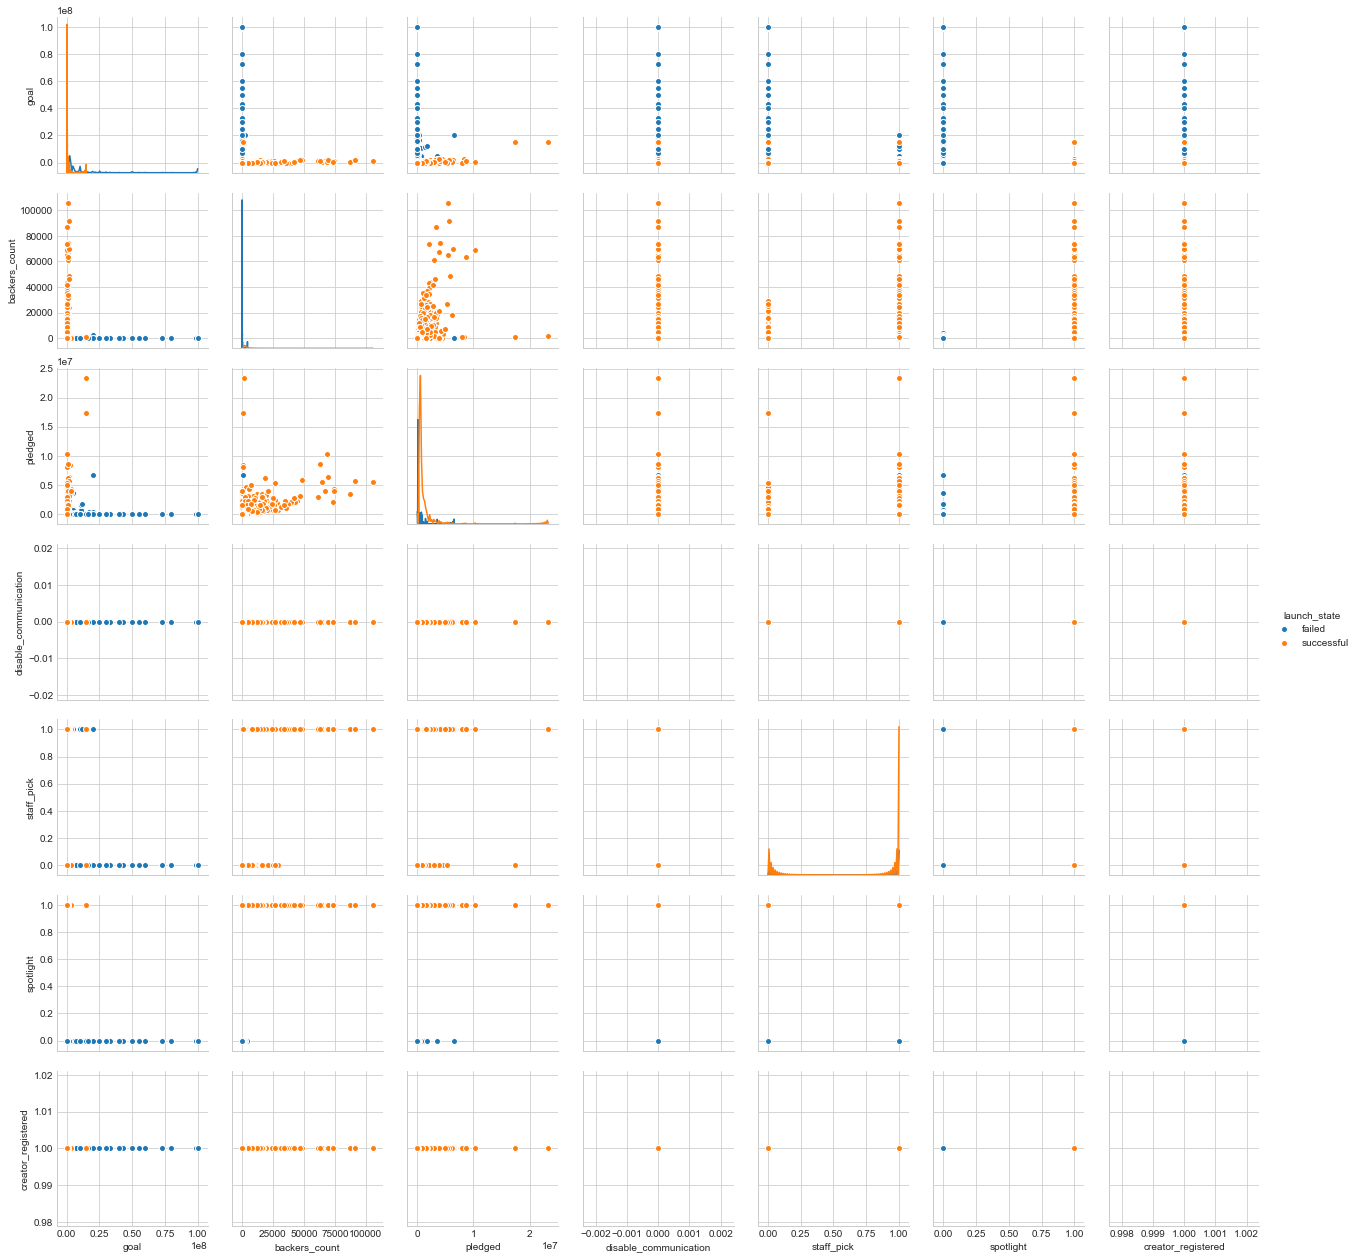

In [12]:
sns.set_style('whitegrid')
sns.pairplot(data=df.drop(columns=['id','name']), hue='launch_state', diag_kind='kde')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173887 entries, 0 to 173886
Data columns (total 15 columns):
id                       173887 non-null int64
name                     173887 non-null object
category                 173887 non-null object
goal                     173887 non-null float64
backers_count            173887 non-null int64
pledged                  173887 non-null float64
disable_communication    173887 non-null bool
country                  173887 non-null object
deadline                 173887 non-null datetime64[ns]
created_at               173887 non-null datetime64[ns]
launched_at              173887 non-null datetime64[ns]
staff_pick               173887 non-null bool
spotlight                173887 non-null bool
creator_registered       173887 non-null bool
launch_state             173887 non-null object
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 21.6+ MB


In [9]:
df.name[0]

'Jozii-College Jobs Made Easy'

In [12]:
df['disable_communication'].unique()

array([False])

In [13]:
df['staff_pick'].unique()

array([False,  True])

In [14]:
df['spotlight'].unique()

array([False,  True])

In [15]:
df['creator_registered'].unique()

array([ True])

In [16]:
df.drop(columns=['name', 'disable_communication', 'creator_registered'], inplace=True)

In [17]:
df.head()

,id,category,goal,backers_count,pledged,country,deadline,created_at,launched_at,staff_pick,spotlight,launch_state
0,895922629,technology,3500.0,1,50.00,US,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,failed
1,1190376005,games,225.0,63,1613.47,US,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,successful
2,672906219,publishing,6500.0,113,6633.00,US,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True,successful
3,2121203785,fashion,15000.0,1,1.00,GB,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False,failed
4,434454655,fashion,15000.0,99,25338.00,CA,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True,successful


In [18]:
category = pd.get_dummies(df['category'], drop_first=True)

In [19]:
category.head()

,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [20]:
country = pd.get_dummies(df['country'], drop_first=True)

In [21]:
country.head()

,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,...,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
d_launch_state = dict(zip(['failed','successful'], range(0,2)))

In [23]:
d_launch_state

{'failed': 0, 'successful': 1}

In [24]:
launch_state = df['launch_state'].map(d_launch_state)

In [25]:
df[df['launch_state'] == 'successful'].shape[0] - launch_state.sum() # Check mapping

0

In [26]:
# Drop the categorical columns

In [27]:
df.drop(['category','country','launch_state'],axis=1,inplace=True)

In [28]:
df.head()

,id,goal,backers_count,pledged,deadline,created_at,launched_at,staff_pick,spotlight
0,895922629,3500.0,1,50.00,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False
1,1190376005,225.0,63,1613.47,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True
2,672906219,6500.0,113,6633.00,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True
3,2121203785,15000.0,1,1.00,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False
4,434454655,15000.0,99,25338.00,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True


In [31]:
# Add the new dummy variable columns

In [29]:
df = pd.concat([df, country, category, launch_state],axis=1)

In [30]:
df.head()

,id,goal,backers_count,pledged,deadline,created_at,launched_at,staff_pick,spotlight,AF,...,film & video,food,games,journalism,music,photography,publishing,technology,theater,launch_state
0,895922629,3500.0,1,50.00,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,0,...,0,0,0,0,0,0,0,1,0,0
1,1190376005,225.0,63,1613.47,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,0,...,0,0,1,0,0,0,0,0,0,1
2,672906219,6500.0,113,6633.00,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True,0,...,0,0,0,0,0,0,1,0,0,1
3,2121203785,15000.0,1,1.00,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False,0,...,0,0,0,0,0,0,0,0,0,0
4,434454655,15000.0,99,25338.00,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True,0,...,0,0,0,0,0,0,0,0,0,1


Now we need to consider what exactly some of those columns mean:
* id - still just a primary key
* pledged - somewhat useless except as a comparison to the goal. Drop pledged but add a pledged_ratio column (pledged/goal)
* goal - keep for now but we might drop later due to the potentially high variance with pledged
* deadline - useless except in comparison to launched_at. Drop deadline but add funding_days.
* created_at - useless; launched_at is more applicable.
* launched_at - keep to maybe create some time series plots; move before funding_days
* staff_pick - not exactly sure but convert to 0 (false) and 1 (true)
* spotlight - not exactly sure but covert to 0 (false) and 1 (true)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173887 entries, 0 to 173886
Columns: 218 entries, id to launch_state
dtypes: bool(2), datetime64[ns](3), float64(2), int64(3), uint8(208)
memory usage: 51.8 MB


In [32]:
df.isnull().sum().sum()

0

In [34]:
df.isna().sum().sum()

0

In [35]:
pledged_ratio = df['pledged'] / df['goal']

In [36]:
pledged_ratio.head()

0    0.014286
1    7.170978
2    1.020462
3    0.000067
4    1.689200
dtype: float64

In [37]:
df[['pledged', 'goal']].head()

,pledged,goal
0,50.00,3500.0
1,1613.47,225.0
2,6633.00,6500.0
3,1.00,15000.0
4,25338.00,15000.0


In [38]:
df.columns

Index(['id', 'goal', 'backers_count', 'pledged', 'deadline', 'created_at',
       'launched_at', 'staff_pick', 'spotlight', 'AF',
       ...
       'film & video', 'food', 'games', 'journalism', 'music', 'photography',
       'publishing', 'technology', 'theater', 'launch_state'],
      dtype='object', length=218)

In [39]:
df.columns.get_loc("pledged")

3

In [40]:
df.insert(loc=df.columns.get_loc("pledged"), column='pledged_ratio', value=pledged_ratio)

In [41]:
df.shape

(173887, 219)

In [42]:
df.columns

Index(['id', 'goal', 'backers_count', 'pledged_ratio', 'pledged', 'deadline',
       'created_at', 'launched_at', 'staff_pick', 'spotlight',
       ...
       'film & video', 'food', 'games', 'journalism', 'music', 'photography',
       'publishing', 'technology', 'theater', 'launch_state'],
      dtype='object', length=219)

In [43]:
df.drop(columns='pledged', inplace=True)

In [44]:
df.shape

(173887, 218)

In [45]:
df.columns

Index(['id', 'goal', 'backers_count', 'pledged_ratio', 'deadline',
       'created_at', 'launched_at', 'staff_pick', 'spotlight', 'AF',
       ...
       'film & video', 'food', 'games', 'journalism', 'music', 'photography',
       'publishing', 'technology', 'theater', 'launch_state'],
      dtype='object', length=218)

In [46]:
df['deadline'][0]

Timestamp('2014-11-28 04:59:00')

In [47]:
df['launched_at'][0]

Timestamp('2014-10-28 19:42:54')

In [48]:
df['deadline'][0] - df['launched_at'][0]

Timedelta('30 days 09:16:06')

In [49]:
(df['deadline'][0] - df['launched_at'][0]).days

30

In [50]:
(df['deadline'] - df['launched_at']).head()

0   30 days 09:16:06
1   16 days 00:00:00
2   30 days 00:00:00
3   59 days 23:00:00
4   35 days 00:00:00
dtype: timedelta64[ns]

In [51]:
(df['deadline'] - df['launched_at']).dt.days.head()

0    30
1    16
2    30
3    59
4    35
dtype: int64

In [52]:
funding_days = (df['deadline'] - df['launched_at']).dt.days

In [53]:
df.columns.get_loc("deadline")

4

In [54]:
df.insert(loc=df.columns.get_loc("deadline"), column='funding_days', value=funding_days)

In [55]:
df.drop(columns='deadline', inplace=True)

In [56]:
df.shape

(173887, 218)

In [57]:
df.head()

,id,goal,backers_count,pledged_ratio,funding_days,created_at,launched_at,staff_pick,spotlight,AF,...,film & video,food,games,journalism,music,photography,publishing,technology,theater,launch_state
0,895922629,3500.0,1,0.014286,30,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,0,...,0,0,0,0,0,0,0,1,0,0
1,1190376005,225.0,63,7.170978,16,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,0,...,0,0,1,0,0,0,0,0,0,1
2,672906219,6500.0,113,1.020462,30,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True,0,...,0,0,0,0,0,0,1,0,0,1
3,2121203785,15000.0,1,0.000067,59,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False,0,...,0,0,0,0,0,0,0,0,0,0
4,434454655,15000.0,99,1.689200,35,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df.drop(columns='created_at', inplace=True)

In [59]:
df.head(1)

,id,goal,backers_count,pledged_ratio,funding_days,launched_at,staff_pick,spotlight,AF,AG,...,film & video,food,games,journalism,music,photography,publishing,technology,theater,launch_state
0,895922629,3500.0,1,0.014286,30,2014-10-28 19:42:54,False,False,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
launched_at = df['launched_at']

In [61]:
df.drop(columns='launched_at', inplace=True)

In [62]:
df.insert(loc=df.columns.get_loc("funding_days"), column='launched_at', value=launched_at)

In [63]:
df.head(1)

,id,goal,backers_count,pledged_ratio,launched_at,funding_days,staff_pick,spotlight,AF,AG,...,film & video,food,games,journalism,music,photography,publishing,technology,theater,launch_state
0,895922629,3500.0,1,0.014286,2014-10-28 19:42:54,30,False,False,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
d_staff_pick = dict(zip([False,True], range(0,2)))
staff_pick = df['staff_pick'].map(d_staff_pick)
df[df['staff_pick'] == True].shape[0] - staff_pick.sum() # check mapping

0

In [65]:
d_spotlight = dict(zip([False,True], range(0,2)))
spotlight = df['spotlight'].map(d_spotlight)
df[df['spotlight'] == True].shape[0] - spotlight.sum() # check mapping

0

In [66]:
df.drop(['staff_pick','spotlight'],axis=1,inplace=True)

In [67]:
df.head(1)

,id,goal,backers_count,pledged_ratio,launched_at,funding_days,AF,AG,AL,AM,...,film & video,food,games,journalism,music,photography,publishing,technology,theater,launch_state
0,895922629,3500.0,1,0.014286,2014-10-28 19:42:54,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
df.insert(loc=df.columns.get_loc("AF"), column='staff_pick', value=staff_pick)

In [69]:
df.insert(loc=df.columns.get_loc("AF"), column='spotlight', value=spotlight)

In [70]:
df.head()

,id,goal,backers_count,pledged_ratio,launched_at,funding_days,staff_pick,spotlight,AF,AG,...,film & video,food,games,journalism,music,photography,publishing,technology,theater,launch_state
0,895922629,3500.0,1,0.014286,2014-10-28 19:42:54,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1190376005,225.0,63,7.170978,2011-10-17 18:39:11,16,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,672906219,6500.0,113,1.020462,2014-08-13 06:12:18,30,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2121203785,15000.0,1,0.000067,2016-03-04 21:04:16,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,434454655,15000.0,99,1.689200,2015-03-18 05:01:38,35,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
df['staff_pick'].unique()

array([0, 1], dtype=int64)

In [72]:
df['spotlight'].unique()

array([0, 1], dtype=int64)

In [73]:
# Null value check
df.isnull().sum().sum()

0

In [74]:
df.isna().sum().sum()

0

In [100]:
df.columns

Index(['id', 'goal', 'backers_count', 'pledged_ratio', 'launched_at',
       'funding_days', 'staff_pick', 'spotlight', 'AF', 'AG',
       ...
       'film & video', 'food', 'games', 'journalism', 'music', 'photography',
       'publishing', 'technology', 'theater', 'launch_state'],
      dtype='object', length=217)

In [101]:
df.head(1)

,id,goal,backers_count,pledged_ratio,launched_at,funding_days,staff_pick,spotlight,AF,AG,...,film & video,food,games,journalism,music,photography,publishing,technology,theater,launch_state
0,895922629,3500.0,1,0.014286,2014-10-28 19:42:54,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [109]:
df.drop(df.columns[8:216], axis=1).drop(columns='id').head(1)

,goal,backers_count,pledged_ratio,launched_at,funding_days,staff_pick,spotlight,launch_state
0,3500.0,1,0.014286,2014-10-28 19:42:54,30,0,0,0


C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


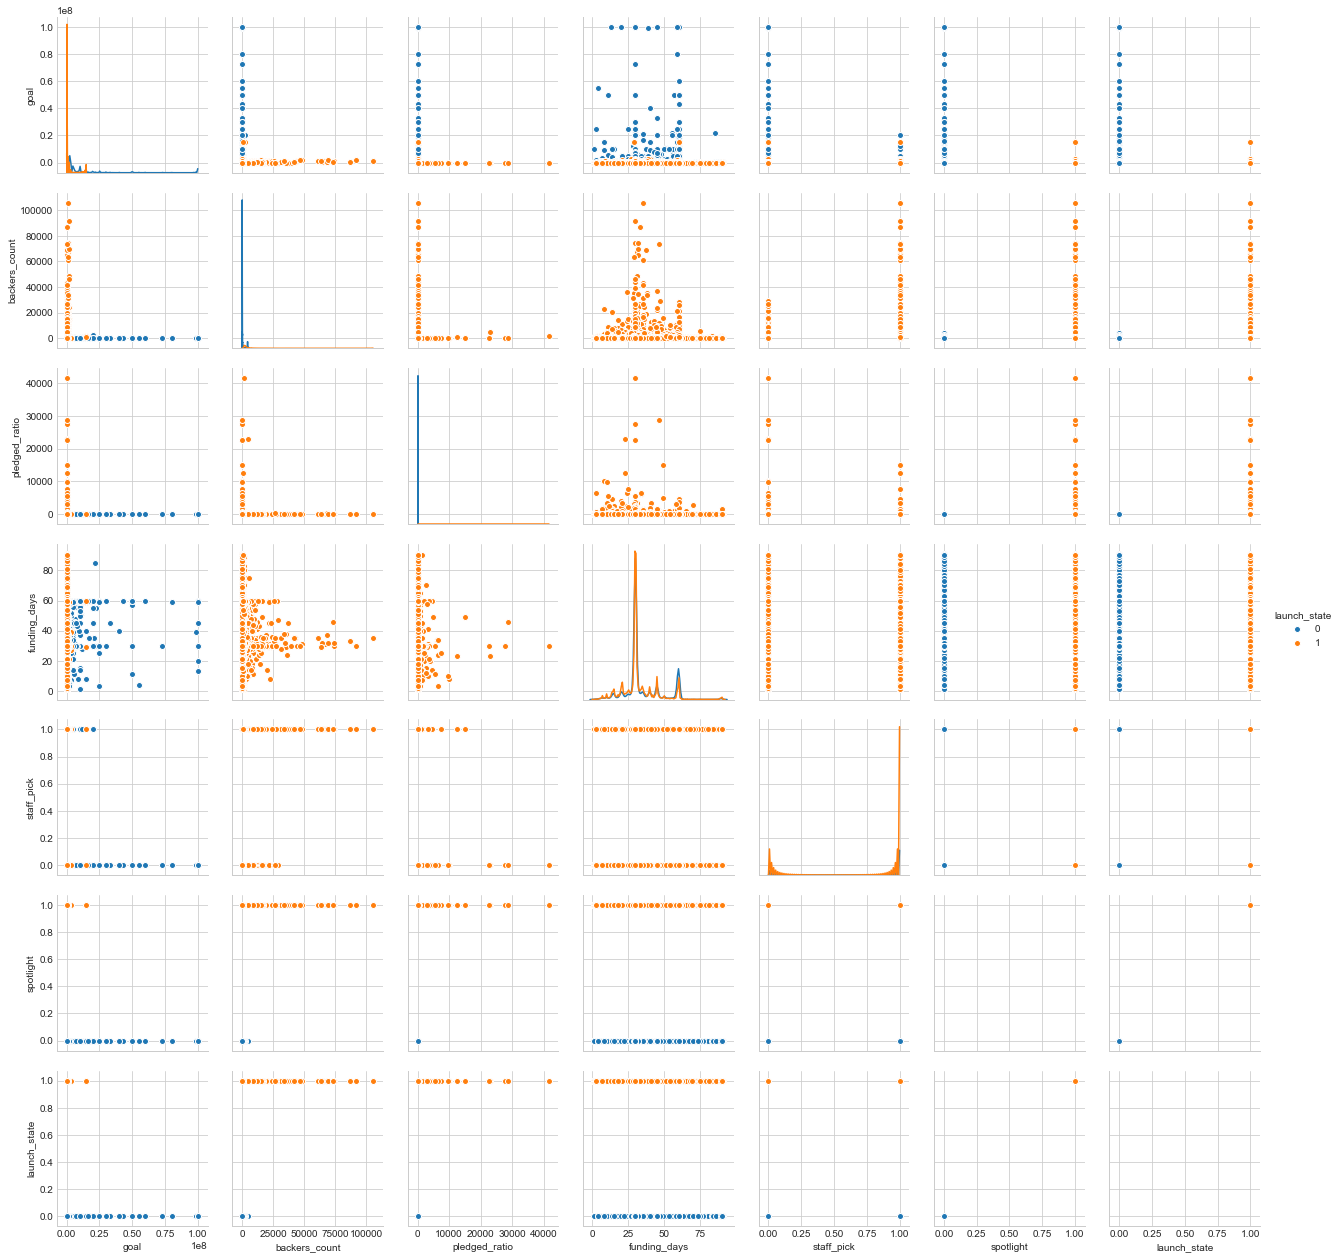

In [111]:
%matplotlib qt
sns.set_style('whitegrid')
sns.pairplot(data=df.drop(df.columns[8:216], axis=1).drop(columns='id'), diag_kind='kde', hue='launch_state')

In [134]:
# ========================================
# LOAD/SAVE CSV
# ========================================
df.to_csv('data/df02.csv', sep=",")

In [105]:
# df = pd.read_csv('data/df.csv', sep=',', na_filter=False, index_col=0, parse_dates=['deadline','created_at','launched_at'])